# Inhaltsverzeichnis

- 1 Einleitung
  - 1.1 Motivation
  - 1.2 Zielsetzung
  - 1.1 Forschungsfragen
  - 1.1 Aufbau der Arbeit
- 2 Theoretischer Rahmen
  - 2.1 Machine Learning
  - 2.2 Reinforcement Learning
    - 2.2.1 Konzepte der Erkundung und Ausbeutung
  - 2.3 Multi-Armed Bandits
    - 2.3.1 Epsilon-Greedy
    - 2.3.2 Upper-Confidence-Bound
    - 2.3.1 Thompson-Sampling
- 3 Daten und Methodik
  - 3.1 Beschreibung der verwendeten Daten
    - 3.1.1 Datenstruktur der Bewertungsdatei (ratings.csv)
    - 3.1.2 Datenstruktur der Tags-Datei (tags.csv)
    - 3.1.3 Datenstruktur der Filmdatei (movies.csv)
  - 3.2 Datenbereinigung
  - 3.3 Explorative Datenanalyse und Feature Engineering
  - 3.4 Preprocessing Pipeline
  - 3.5 Simulationsumgebung
- 4 Ergebnisse und Diskussion
- 5 Zusammenfassung und Ausblick

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# Abbildungsverzeichnis

- 2.1 Unterschied von herkömmlicher Programmierung zu maschinellem Lernen
- 2.2 MAB Beispiel für Filmempfehlungen
- 2.3 Optimismus angesichts von Unsicherheit
- 4.1 Belohnungen für Bandit-Problem mit Replay-Auswertung

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# Abkürzungsverzeichnis

**EDA** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Explorative Datenanalyse

**ER** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Entity Relationship

**MAB** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Multi-Armed Bandit

**ML** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Machine Learning

**OHE** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One-Hot-Encoding

**RL** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Reinforcement Learning

**UCB** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Upper-Confidence-Bound

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# Kapitel 1
# Einleitung

Die vorliegende Arbeit untersucht die Potenziale und Herausforderungen zur Filmempfehlung mithilfe von Methoden des Reinforcement Learnings (RL). Als Datengrundlage wird hierfür der "MovieLens 25M" Datensatz verwendet. Dieser beschreibt 5-Sterne-Bewertungen und Freitext-Taggings von MovieLens, einem Filmpfehlungsdienst [1]. Es wird also ein RL-basiertes Recommender System auf Basis dieser Datenquelle umgesetzt. Im einleitenden Kapitel wird zunächst die Motivation fur die Arbeit erläutert. Anschließend wird die Zielsetzung beschrieben und daraus resultierende Forschungsfragen werden gestellt.

## 1.1 Motivation

Filmempfehlungssysteme spielen heutzutage eine entscheidende Rolle um die Nutzererfahrung zu verbessern und die Konkurrenzfähigkeit von Streaming-Plattformen zu steigern. Die Anpassung an unterschiedliche Nutzerpräferenzen und wechselnde Filmauswahlen ist jedoch eine Herausforderung. Filmempfehlungen, die die individuellen Präferenzen der Nutzer möglichst genau treffen, sind unerlässlich, um die Nutzerbindung zu verbessern und personalisierte Unterhaltungserlebnisse zu optimieren. Dabei gibt es mittlerweile eine Vielzahl an Modellen, welche diese Aufgabe bewerkstelligen können. Besonders häufig kommen dabei Recommender Systeme mit Content-Based Filtering und Collaborative Filtering Methoden zum Einsatz [2, S. 8]. Diese nutzen historische Daten und Merkmale, um Ähnlichkeiten zu identifizieren und Empfehlungen abzuleiten. Eine weitere Möglichkeit sind RL-Methoden. Diese Ansätze verfolgen eine andere Strategie: Sie nutzen eine Agenten-Interaktion mit der Umgebung und passen die Empfehlungsstrategie basierend auf Belohnungen an, die durch Benutzerfeedback entstehen (vgl. Kapitel 2.3). Dabei geht es darum, ein Gleichgewicht zwischen der Erkundung neuer und der Nutzung bekannter Optionen zu schaffen. Die Motivation dieser Arbeit liegt also darin, die Wirksamkeit von verschiedenen Multi-Armed Bandit-Algorithmen in Bezug auf die Filmempfehlung zu erforschen und zu vergleichen.

## 1.2 Zielsetzung

Ziel der Arbeit ist es die Bewertungen in den MovieLens Daten zu verwenden um einen Agenten zu trainieren, der im Anschluss möglichst gute Filmempfehlungen abgeben kann. Die Ergebnisse der verschiedenen Algorithmen sollen gegenübergestellt und analysiert werden. Dies soll Aufschluss darüber geben, ob die ausgewählten Modelle als Recommender Systeme geeignet sind und ob der Einsatz einer Methode im Vergleich zu anderen bevorzugt werden kann.

## 1.3 Forschungsfragen

Basierend auf der Zielsetzung ergeben sich folgende Forschungsfragen:

- Wie ist die Leistung der Modelle in Hinsicht auf die Filmempfehlungsqualität zu beurteilen?
- Ist die Implementierung einer Methode im Vergleich zur anderen zu bevorzugen?

## 1.4 Aufbau der Arbeit

Die nachfolgenden Kapitel der Arbeit sind folgendermaßen gestaltet:

- **Kapitel 2 - Theoretischer Rahmen**  
Die zugrundeliegenden Konzepte, notwendigen Begriffe und verwendete Modelle werden näher erläutert.

- **Kapitel 3 - Daten und Methodik**  
Die verwendeten Daten werden präsentiert und untersucht. Notwendige Schritte eines Projektes mit Implementierung von maschinellen Lernmodellen werden erörtert
und Evaluationsmetriken werden vorgestellt.

- **Kapitel 4 - Ergebnisse und Diskussion**  
Die Ergebnisse der verschiednen Recommender werden dargestellt und diskutiert.

- **Kapitel 5 - Zusammenfassung und Ausblick**  
Abschließend werden die Erkenntnisse der Arbeit als Fazit zusammengefasst und
zusätzlich werden offengebliebene Fragen besprochen, welche auf weitere mögliche Untersuchungen hinweisen.

# Kapitel 2
# Theoretischer Rahmen

In diesem Kapitel werden die theoretischen Grundlagen, welche für die Arbeit relevant sind, dargestellt. Um die verwendeten Verfahren für das Recommender System verstehen zu können, werden die notwendigen technologischen Konzepte näher erläutert. Der Schwerpunkt liegt daher vor allem auf den Technologien des Reinforcement Learnings.

## 2.1 Machine Learning

Da RL ein Teilgebiet des maschinellen Lernens oder auf Englisch "Machine Learning" (ML) ist, soll zunächt ein grober Überblick über ML gegeben werden. Es handelt sich dabei um eine Teildisziplin innerhalb der Softwareentwicklung. Laut Samuel [3, S. 211] sei maschinelles Lernen das Fachgebiet, welches Computern das Lernen ermöglicht, ohne explizit auf die zu lernende Aufgabe programmiert zu werden. Herkömmliche Programme funktionieren, indem sie für eine bestimmte Aufgabe Daten erhalten und mithilfe vordefinierter Regeln Lösungen liefern. Diese spezifischen Regeln müssen von den Entwicklern im Vorfeld programmiert werden. Für viele Aufgaben mag das die angemessene Lösung sein und auch gut funktionieren. Maschinelles Lernen jedoch setzt dort an, wo herkömmliche Programmierung an ihre Grenzen stößt. In Abbildung 1 werden die groben Unterschiede beider Ansätze dargestellt.

<div style="text-align:center">
    <img src="imgs/MLvsNormal.JPG" style="width:500px;height:250px"/>
    <p style="font-style: italic;">Abbildung 2.1: Unterschied von herkömmlicher Programmierung zu maschinellem Lernen</p>
</div>

Beim maschinellen Lernen werden also zunächst die Daten und die Lösungen bereitgestellt. Im Anschluss werden mithilfe von maschinellen Lernalgorithmen innerhalb dieser Daten Gesetzmäßigkeiten abgeleitet. Erklären lässt sich das z.B. am Spamfilter. Eine Machine-Learning-Anwendung, welche bereits seit Ende der 90er Jahre zum Einsatz kommt [4, S. 55]. Das folgende Beispiel zum Spamfilter basiert auf Géron [5, S. 2 f.]. Ziel des Spamfilters ist es, Spam als solchen zu erkennen und zu markieren. Wenn mit herkömmlicher Programmierung, bspw. das Wort „Gewinnspiel“ in Spam-Nachrichten erkannt werden soll, muss eine Regel dafür definiert werden. Spammer könnten darauf reagieren, indem sie auf das Wort „Gewinnaktion“ ausweichen. Damit die Mail wieder als Spam kategorisiert wird, muss eine weitere Regel, für diesen Fall definiert werden. So ergibt sich im Laufe der Zeit eine lange und unter Umständen komplexe Liste an Regeln, welche die Wartung des Programms enorm erschwert [5, S.3]. Ein Spamfilter auf Basis von ML hingegen, erkennt ungewöhnlich oft vorkommende Wörter oder Wortmuster innerhalb von Spam automatisch. Nutzer können außerdem Mails, die nicht als Spam erkannt wurden, selbst als solchen markieren, was wiederum als neuer Input für Trainingsdaten verwendet werden kann. Den Prozess des Lernens bezeichnet man beim maschinellen Lernen auch als Training (vgl. Kapitel 3). Der Spamfilter vergleicht so normale Emails mit Spam und erkennt wiederkehrende Muster, die auf Spam hindeuten. Das resultiert in einem kürzeren Code, welcher die Wartung des Programms erleichtert und gleichzeitig die Leistung verbessert. Für weitere Beispiele zu Machine-Learning-Anwendungen wird auf Géron [5, S. 5 - 7] verwiesen. Maschinelles Lernen in ein Projekt einzubinden, macht also dann Sinn, wenn:

- Das Programm dadurch simpler zu warten ist und die Performance gesteigert werden kann.
- Das Programm eine große Menge an Daten verarbeiten muss, die sich evtl. verändern.
- Probleme gelöst werden müssen, die mit herkömmlicher Programmierung noch nicht gelöst werden konnten [5, S. 5].

## 2.2 Reinforcement Learning

Grundlegend fur die vorliegende Arbeit ist das Gebiet des Reinforcement Learnings oder auf Deutsch "bestärkendes Lernen". Gängigere Arten des maschinellen Lernerns sind das überwachte Lernen (supervised learning) und das unüberwachte Lernen (unsupervised learning). RL unterscheidet sich grundlegend von den zuvor genannten Methoden durch das Lernparadigma und die Art und Weise, wie die Algorithmen trainiert werden.

1. Supervised Learning erfolgt mit Trainingsdaten, welche bereits die Lösung, auch Labels genannt, beinhalten. Typische Aufgaben des überwachten Lernens, sind die Klassifikation und die Regression. Das Ziel ist es, eine Abbildung von den Eingaben auf die richtigen Ausgaben zu erlernen. Der Algorithmus lernt, indem er Fehler zwischen den vorhergesagten Ausgaben und den tatsächlichen Zielwerten minimiert.

2. Unsupervised Learning unterscheidet sich vom überwachten Lernen dadurch, dass die Trainingsdaten keine Labels, also nicht die gewünschte Lösung, beinhalten. Der Lernalgorithmus versucht Muster und Gemeinsamkeiten in den Daten zu erkennen. Ähnliche Daten werden so zusammen kategorisiert um z.B. Clusterbildung oder Dimensionalitätsreduktion durchzuführen.

3. Beim Reinforcement Learning führt das Lernsystem, welches man auch als Agenten bezeichnet, Aktionen innerhalb einer Umgebung aus. Dafür erhält es Belohnungen oder Strafen, je nachdem ob die ausgeführte Aktion das gewünschte Ergebnis erzielt oder nicht. Dadurch optimiert das System eigenständig die Entscheidungen die es trifft, um möglichst viele Belohnungen zu erhalten.

RL evaluiert also Aktionen anstatt konkrete Aktionen vorzugeben wie beim Supervised Learning. Nach Sutton und Barto [6, S. 2] müsse ein lernender Agent also in gewissem Maße den Zustand seiner Umgebung wahrnehmen können und in der Lage sein, Aktionen auszuführen, die den Zustand beeinflussen. Der Agent müsse auch ein Ziel oder Ziele haben, die sich auf den Zustand der Umgebung beziehen. Markow-Entscheidungsprozesse seien darauf ausgelegt, genau diese drei Aspekte - Wahrnehmung, Aktion und Ziel - in ihren einfachsten möglichen Formen einzuschließen, ohne sie zu trivialisieren.

### 2.2.1 Konzepte der Erkundung und Ausbeutung

Folgende Erläuterung basiert auf Barto und Sutton [6, S. 3]. Eine der besonderen Herausforderungen beim Reinforcement Learning, die in anderen Lernmethoden nicht auftreten, ist das Dilemma zwischen Erkundung und Ausbeutung. Um hohe Belohnungen zu erzielen, muss der Agent bevorzugt diejenigen Aktionen auswählen, die sich in der Vergangenheit als wirksam erwiesen haben. Doch um potenziell bessere Aktionen zu finden, muss er auch neue, unerforschte Aktionen ausprobieren. Es ist also notwendig, bereits bekannte Informationen zu nutzen, um Belohnungen zu erhalten, aber gleichzeitig auch neues Wissen zu sammeln, um langfristig besser zu performen. Das Problem besteht darin, dass reines Streben nach Ausbeutung oder Erkundung nicht zum gewünschten Erfolg führt. Ein ausgewogener Ansatz ist erforderlich, bei dem der Agent eine Vielzahl von Aktionen ausprobiert und im Laufe der Zeit die effektivsten auswählt. In stochastischen Umgebungen muss jede Aktion häufig wiederholt werden, um eine zuverlässige Vorhersage der erwarteten Belohnungen zu erhalten. Das Erkundungs-Ausbeutungs-Dilemma wurde von Mathematikern über viele Jahrzehnte hinweg intensiv untersucht, aber eine endgültige Lösung bleibt bisher aus.

## 2.3 Multi-Armed Bandits

Die in dieser Arbeit verwendeten RL-Methoden basieren alle auf dem Konzept des Multi-Armed Bandits (MAB) oder zu Deutsch "Mehrarmiger Bandit", oftmals auch k-Armed Bandit genannt. Der Name leitet sich von einem hypothetischen Glücksspielautomaten (einarmiger Bandit) ab, bei dem ein Spieler vor mehreren Spielautomaten (den sogenannten "Armen") steht und sich entscheiden muss, an welchem Automaten er ziehen möchte, ohne zu wissen, welcher Automat die höchsten Gewinne erzeugt. Nach White [7, S. vi] beschreiben die Arme im Kontext des MAB die möglichen Optionen die zur Verfügung stehen, also welche Aktionen vom Agenten ausgeführt werden können. Laut Barto und Sutton [6, S. 25 f.] beinhaltet das vorliegende Lernproblem die wiederholte Entscheidung zwischen k verschiedenen Aktionen. Infolge jeder Entscheidung wird eine numerische Belohnung verliehen, die aus einer konstanten Wahrscheinlichkeitsverteilung ausgewählt wird, abhängig von der ausgewählten Aktion. Jede der k Aktionen hat eine erwartete oder mittlere Belohnung, vorausgesetzt, dass diese Aktion ausgewählt wird. Das übergeordnete Ziel besteht darin, die erwartete Gesamtbelohnung über einen bestimmten Zeitraum hinweg zu maximieren, beispielsweise über 1000 durchgeführte Aktionen oder Zeitschritte. Da der Lernalgorithmus inkrementell auf neue Datenpunkte reagiert, während sie eintreffen gehört der MAB zu den Online Learning Algorithmen. Der Algorithmus lernt also schrittweise, während er mit neuen Informationen konfrontiert wird. Folgende Gleichung beschreibt wie der Wert einer Aktion (action value) berechnet wird. Dabei steht $A_{t}$ für die ausgewählte Aktion $A$ zum Zeitpunkt $t$. Die korrespondierende Belohnung wird als $R_{t}$ bezeichnet. Der Wert einer beliebigen Aktion $a$, bezeichnet als $q_{*}(a)$, ist die erwartete Belohnung, unter der Voraussetzung, dass $a$ ausgewählt wird.

$$
q_{*}(a)≐𝔼  [R_{t} \mid A_{t}=a]
\qquad\ (2.1)
$$

Wenn die Werte jeder Aktion bekannt wären, wäre es eine einfache Aufgabe, das Problem des MAB zu lösen &ndash; Man würde immer die Aktion mit dem höchsten Wert auswählen. Es wird angenommen, dass die Werte der Aktionen nicht mit Sicherheit bekannt sind, obwohl Schätzungen möglich sind. Die geschätzten Werte der Aktion $a$ zum Zeitpunkt $t$ werden als $Q_{t}(a)$ bezeichnet. Es wird angestrebt, dass $Q_{t}(a)$ nahe an $q_{*}(a)$ liegt.

$$
Q_{t}(a)≐\dfrac{Summe\ der\ Belohnungen\ wenn\ a\ ausgewählt\ wurde\ vor\ dem\ Zeitpunkt\ t}{Anzahl\ von\ ausgewählten\ Aktionen\ a\ vor\ dem\ Zeitpunkt\ t}
=\dfrac{\sum_{i=1}^{t-1}R_{i}\ {}_{A_{i}=a}}{\sum_{i=1}^{t-1} 1\ {}_{A_{i}=a}}
=\dfrac{1}{t-1}\ \sum_{i=1}^{t-1}R_{i}
\qquad (2.2)
$$

Dieses Verfahren wird auch als sample-average Methode (Stichprobenmittelwertmethode) bezeichnet [6, S. 27]. Falls Aktion $a$ noch nicht ausgeführt wurde, wird ein Initialwert festgelegt wie z.B. Null. Das Problem hierbei ist, dass die vorausgehenden Daten stets gespeichert werden müssten, um die Schätzungen zu aktualisieren. Jede ausgeführte Aktion würde in einen erhöhten Verbrauch des Arbeitsspeichers und mehr erforderlicher Rechenleistung resultieren. Für eine spezifische Aktion wird die aktuelle Schätzung folgendermaßen berechnet:

$$
Q_{n}≐\dfrac{R_{1}+R_{2}\ ... +R_{n-1}}{n-1}
\qquad (2.3)
$$

Daher wird die inkrementelle Aktualisierungsregel [6, S. 30 ff.] angewandt, um die Berechnung der Schätzung zu optimieren.

$$\begin{aligned}
Q_{n+1}&=\dfrac{1}{n}\ \sum_{i=1}^{n}R_{i} \\
&=\dfrac{1}{n} \bigg(R_{n} + \sum_{i=1}^{n-1}R_{i} \bigg) \\
&=\dfrac{1}{n} \bigg(R_{n} + (n-1) \dfrac{1}{n-1}\sum_{i=1}^{n-1}R_{i} \bigg) \\
&=\dfrac{1}{n} \big(R_{n} + (n-1) Q_{n} \big) \\
&=\dfrac{1}{n} \big(R_{n} + nQ_{n} - Q_{n} \big) \\
&=Q_{n} + \dfrac{1}{n}[R_{n} - Q_{n}]
\qquad\qquad\qquad\qquad (2.4)
\end{aligned}$$

Hierfür wird zunächst die aktuelle Belohnung aus der Summe gezogen und die verbleibende Summe durch $(n-1)$ multipliziert mit dem aktuellen Schätzwert ersetzt. Dadurch ist es nicht mehr nötig vorausgehende Belohnungen zu speichern. Damit der Agent nun eine Entscheidung basierend auf den Schätzungen treffen kann bedarf es einer Richtlinie. Die einfachste Richtlinie zur Auswahl von Aktionen besteht darin, die Aktion mit dem höchsten geschätzten Wert auszuwählen. Dies bezeichnet man als gierig oder auf Englisch "greedy". Die gierige Aktion wird folgendermaßen dargestellt:

$$
A_{t}≐\underset{a}{\mathrm{argmax}}\ Q_{t}(a)
\qquad (2.5)
$$

Hierbei bezeichnet $argmax_{a}$ die Aktion $a$, für die der nachfolgende Ausdruck maximiert wird. Die Auswahl gieriger Aktionen nutzt stets das aktuelle Wissen aus, um unmittelbare Belohnungen zu maximieren [6, S. 27] (vgl. 2.2.1 Konzept der Ausbeutung). Um den Ablauf des MAB-Problems zu verdeutlichen soll ein Beispiel besprochen werden, in diesem ein Angesteller einer Videothek Filmempfehlungen für die Kunden vergibt. Der Einfachkeit halber beschränkt sich das Beispiel auf drei Filme. Die Filme repräsentieren die Arme des Banditen. Jeder Arm resultiert in einer unbekannten Belohnung, die angibt wie gut ein Film den Kunden Gefallen hat. Die Belohnungen sind nicht auf einen Wert festgelegt sondern unterliegen einer unbekannten Varianz. Das könnte z.B. damit zu tun haben, dass unterschiedliche Kunden unterschiedliche Filmpräferenzen haben. Folgende Abbildung stellt die drei Beispielverteilungen dar. Auf der X-Achse ist eine beliebige Belohnung dargestellt und die Y-Achse represäntiert wie oft der jeweilige Wert für die Belohnung vergeben wurde. Die genauen Werte sind dabei für das Beispiel nicht von Belang. Im Durchschnitt ist Film A am beliebtesten, Film B an zweiter Stelle und Film C am unbeliebtesten.

In [3]:
%%capture
# Output der Zelle unterdrücken und png in nächster Markdown Zelle aufrufen
import numpy as np
import matplotlib.pyplot as plt

# Funktionen definieren
def gaussian(x, mean, std_dev):
    return np.exp(-((x - mean)**2) / (2 * std_dev**2))

# x-Werte erzeugen
x = np.linspace(0, 20, 400)

# Funktionen parameterisieren
mean_std_pairs = [(10, 5), (8, 2), (5, 3)]
labels = ["Film A", "Film B", "Film C"]

plt.figure(figsize=(10, 6))

for (mean, std_dev), label in zip(mean_std_pairs, labels):
    y = gaussian(x, mean, std_dev)
    plt.plot(x, y, label=label)

plt.title("MAB Beispiel für Filmempfehlungen")
plt.xticks(np.arange(0, 21, step=2))
plt.xlabel("Belohnung")
plt.yticks([])
plt.ylabel("Anzahl")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("imgs/MAB-Beispiel.PNG")

<div style="text-align:center">
    <img src="imgs/MAB-Beispiel.PNG" style="width:800px;height:480px"/>
    <p style="font-style: italic;">Abbildung 2.2: MAB Beispiel für Filmempfehlungen</p>
</div>

Um die gierige Richtlinie zu verfolgen könnte der Agent nun jede der drei Aktionen einmal ausführen und anschließend nur noch die Aktion weiter verfolgen, die die größte Belohnung hervorgebracht hat. Das Problem hierbei ist, dass so mit großer Wahrscheinlichkeit die Gesamtbelohnung über alle Zeitschritte hinweg nicht maximiert wird. Wenn der Agent aufgrund der Varianz nun beim ersten Durchlauf für den Film C eine höhere Belohnung erhalten hat als für den Film A, würde dieser nur noch den Film C auswählen und somit auf Dauer die Gesamtbelohnung nicht optimieren. Es ist also von Nöten eine Balance zwischen Ausbeutung und Erkundung einzuführen. In den folgenden Unterkapiteln werden die drei verwendeten Algorithmen für die Arbeit vorgestellt, die einen solchen Ansatz verfolgen.

### 2.3.1 Epsilon-Greedy
Die erste Methode um eine Balance zwischen Ausbeutung und Erkundung einzuführen ist die Epsilon-Greedy Richtlinie. Ähnlich wie die gierige Richtlinie wählt der Epsilon-Greedy Algorithmus nahezu immer die Aktion mit der höchsten Schätzung für die Belohnung. Mit einer kleinen Wahrscheinlichkeit $ε$ wird jedoch eine zufällige Aktion ausgewählt, unabhängig von den Schätzwerten. Nach Barto und Sutton [6, S. 28] sei ein Vorteil dieser Methode, dass, wenn die Anzahl der Schritte zunimmt, jede Aktion unendlich oft ausgewählt werde. Dadurch sei sichergestellt, dass alle $Q_{t}(a)$ gegen $q_{*}(a)$ konvergieren. Dies impliziere, dass die Wahrscheinlichkeit, die optimale Aktion auszuwählen, gegen größer als $(1-ε)$ konvergiere und somit nahezu Gewissheit erreiche. Somit kann die Epsilon-Greedy Richtlinie folgendermaßen dargestellt werden:

$$
A_{t} \leftarrow
\begin{cases}
\underset{}{\mathrm{argmax_{a}}}\ Q_{t}(a) & \quad \text{mit Wahrscheinlichkeit 1-ε \quad (Zufällige Entscheidung bei Gleichstand)}\\ 
a \sim Uniform(\{a_{1}\ ...\ a_{k}\}) & \quad \text{mit Wahrscheinlichkeit ε}
\end{cases}
\qquad\ (2.6)
$$

### 2.3.2 Upper-Confidence-Bound

Eine weitere Richtlinie, die versucht ε-greedy weiter zu optimieren ist Upper-Confidence-Bound (UCB). Das Problem, welches UCB versucht bei ε-greedy anzusprechen ist, dass wenn unter der ε-greedy Richtlinie erkundet wird, eine zufällige Aktion ausgewählt wird. Es wäre besser, aus den nicht gierigen Aktionen entsprechend ihres Potenzials, die bestmöglichen auszuwählen. Dabei werden sowohl die Differenz ihrer Schätzungen zum Maximalwert als auch die Unsicherheiten in diesen Schätzungen berücksichtigt [6, S. 35 f.]. Jede Schätzung unterliegt einer gewissen Unsicherheit (siehe Abb. 2.3).

In [4]:
%%capture
import matplotlib.pyplot as plt

def plot_with_brackets(ax, brackets, num):
    ax.plot([0, 1], [0, 0], color='black')  # Horizontale Linie
    redline = (brackets[0] + brackets[1]) / 2
    ax.axvline(x=redline, color='red', ymin=0.4, ymax=0.6)  # Vertikale Linie
    ax.text(redline, 0, f"Q(a{num+1})", transform=ax.transAxes, color='r', fontsize=12, va='center', ha='center')
    ax.text(brackets[0], 0, '(', fontsize=20, va='center', ha='center')
    ax.text(brackets[1], 0, ')', fontsize=20, va='center', ha='center')  # Kleinere Schriftgröße für rechte Klammer
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, 0.5)
    ax.axis('off')

# Gemeinsame vertikale Linienposition für alle Abbildungen
vertical_line = 0.5

# Berechnung der Klammernpositionen basierend auf gewünschter Distanz
distance_between_brackets = 0.2
center_to_left_bracket = (1 - distance_between_brackets) / 2
center_to_right_bracket = (1 + distance_between_brackets) / 2

# Daten für die Position der Klammern und des roten Strichs
bracket_positions = [(0.2, 0.6), (0.4, 0.66), (0.3, 0.9)]

# Abbildung erstellen
fig, axs = plt.subplots(3, 1, figsize=(6, 4))

for index, (ax, brackets) in enumerate(zip(axs, bracket_positions)):
     plot_with_brackets(ax, brackets, index)


plt.tight_layout()
plt.suptitle("Optimismus angesichts von Unsicherheit")
plt.savefig("imgs/Optimismus.PNG")

<div style="text-align:center">
    <img src="imgs/Optimismus.PNG" style="width:600px;height:400px"/>
    <p style="font-style: italic;">Abbildung 2.3: Optimismus angesichts von Unsicherheit</p>
</div>

Der Bereich zwischen den Klammern gibt das Konfidenzintervall an. Die linke Klammer gibt die Untergrenze und die rechte Klammer die Obergrenze an. Im Intervall liegt mit Sicherheit die erwartete Belohnung $q_{*}(a)$. Je kleiner das Konfidenzintervall desto kleiner ist auch die Unsicherheit einer Schätzung. Im Umkehrschluss bedeutet das, je größer das Intervall ist desto größer ist auch die Unsicherheit. Mit der UCB Richtlinie folgt man dem Prinzip "Optimismus angesichts von Unsicherheit". Das bedeutet, dass bei Unsicherheit stets die optimistischste Entscheidung getroffen werden soll. Im Falle des Beispiels in Abbildung 2.3 wäre das die Aktion $a_{3}$. Die Strategie verfolgt dabei zwei zugrundeliegende Effekte: entweder man wählt so wirklich die Aktion mit der höchsten Belohnung oder man erhält Informationen zur Aktion, deren Unsicherheit am größten ist. Dadurch wird auch die Unsicherheit für den nächsten Schritt verkleinert. UCB ist folgendermaßen definiert:

$$
A_{t}≐\underset{a}{\mathrm{argmax}}\Bigg[Q_{t}(a) + \sqrt[c]{\dfrac{\ln t}{N_{t}(a)}}\ \Bigg]
\qquad (2.7)
$$

Wie auch bei ε-greedy oder der gierigen Richtlinie wählt man zunächst den höchsten Schätzwert $Q_{t}(a)$, welcher die Ausbeutung repräsentiert und addiert dazu den Erkundungsterm für UCB. Dabei ist $c>0$ ein nutzerspezifizierter Wert, der die Menge an Exploration festlegt und $N_{t}(a)$ beschreibt die Anzahl der Male, die Aktion $a$ vor dem Zeitpunkt $t$ ausgewählt wurde. Folgende Erläuterung basiert auf Barto und Sutton [6, S. 36]. Die Idee einer solchen Auswahl der Aktion besteht darin, dass der Wurzelterm ein Maß für die Unsicherheit oder Varianz im Wert von $Q_{t}(a)$ ist. Wird $a$ ausgewählt steigt der Wert im Nenner, der Ausdruck wird kleiner und die Unsicherheit verringert sich. Die Verwendung des natürlichen Logarithmus bedeutet, dass die Menge der Explorationen im Laufe der Zeit kleiner werden, aber unbegrenzt sind. Alle Aktionen werden letztendlich ausgewählt, aber Aktionen mit niedrigeren Werteschätzungen oder solche, die bereits häufig ausgewählt wurden, werden im Laufe der Zeit mit abnehmender Häufigkeit ausgewählt werden.

### 2.3.3 Thompson Sampling

Folgende Erläuterung basiert auf Russo et. al. [8, S. 13-26]. Der Thompson Sampling-Algorithmus verfolgt im Gegensatz zu UCB und Epsilon-Greedy einen probabilistischen Ansatz. Anstatt eine Schätzung der durchschnittlichen Belohnung zu verfeinern, wird stattdessen ein Wahrscheinlichkeitsmodell aus den erhaltenen Belohnungen aufgebaut und der Algorithmus wählt dann Aktionen durch Stichproben aus besagtem Modell. Die Thompson Sampling Richtlinie kann folgendermaßen dargestellt werden, wobei $\theta_{a}(t)$ eine zufällig gezogene Belohnungsverteilung für Aktion $a$ zum Zeitschritt $t$ darstellt.

$$
A_{t}≐\underset{a}{\mathrm{argmax}}[\theta_{a}(t)]
\qquad (2.8)
$$

Die Ausbeutung ist hier implizit in der Verteilung enthalten. Zunächst werden die Wahrscheinlichkeitsverteilungen für die Belohnungen im Laufe der Zeit genauer. Wenn eine Aktion in vorausgehenden Zeitschritten hohe Belohnungen erhalten hat, neigt die Verteilung über die Zeitschritte hinweg höhere Werte anzunehmen. Daher wird der Algorithmus im Laufe der Zeit immer häufiger Aktionen auswählen, die in der Vergangenheit erfolgreich waren.

# Kapitel 3
# Daten und Methodik

In diesem Kapitel werden die verwendeten Daten für die Arbeit vorgestellt und erkundet.
Bevor ML-Modelle implementiert werden können, muss eine Reihe an Methoden und Techniken angewandt werden, um die Daten daraufhin vorzubereiten. Es wird außerdem geklärt, auf welche Details dabei zu achten sind und auf welcher Grundlage die Ergebnisse aus Kapitel 4 evaluiert werden. Notwendige Schritte eines ML-Projektes werden dabei beschrieben und erläutert.

## 3.1 Beschreibung der verwendeten Daten

Folgende Informationen entstammen aus der beigelieferten "README.md" des MovieLens Datensatzes [1]. Es werden nur die relevanten Daten für die Arbeit vorgestellt.

**Formatierung und Kodierung:**  
Die Datensatzdateien sind als durch Kommas getrennte Werte Dateien mit einer einzelnen Kopfzeile geschrieben. Spalten, die Kommas (,) enthalten, sind durch doppelte Anführungszeichen (") geschützt. Diese Dateien sind im UTF-8 Format kodiert.

**Benutzer-IDs:**  
MovieLens-Benutzer wurden zufällig ausgewählt und anonymisiert. Benutzer-IDs sind konsistent zwischen ratings.csv und tags.csv (d.h., dieselbe ID bezieht sich in beiden Dateien auf denselben Benutzer).

**Film-IDs:**
Nur Filme mit mindestens einer Bewertung oder einem Schlagwort sind in den Datensätzen enthalten. Diese Film-IDs entsprechen denjenigen, die auf der Website von MovieLens verwendet werden (z.B. ID 1 entspricht der URL https://movielens.org/movies/1). Film-IDs sind konsistent zwischen ratings.csv, tags.csv, movies.csv und links.csv (d.h., dieselbe ID bezieht sich in diesen vier Datendateien auf denselben Film).

### 3.1.1 Datenstruktur der Bewertungsdatei (ratings.csv)

Alle Bewertungen sind in der Datei ratings.csv enthalten. Jede Zeile dieser Datei nach der Kopfzeile stellt eine Bewertung eines Films durch einen Benutzer dar und hat das folgende Format:  
`Benutzer-ID, Film-ID, Bewertung, Zeitstempel`  
Die Zeilen in dieser Datei sind zuerst nach Benutzer-ID und dann innerhalb eines Benutzers nach Film-ID geordnet. Bewertungen erfolgen auf einer 5-Sterne-Skala mit halben Sterne-Schritten (0,5 Sterne - 5,0 Sterne). Die Zeitstempel repräsentieren Sekunden seit Mitternacht am 1. Januar 1970 in der koordinierten Weltzeit (UTC).

### 3.1.2 Datenstruktur der Tags-Datei (tags.csv)

Alle Tags sind in der Datei tags.csv enthalten. Jede Zeile dieser Datei nach der Kopfzeile stellt ein Tag dar, das von einem Benutzer einem Film zugeordnet wurde, und hat das folgende Format:  
`Benutzer-ID, Film-ID, Tag, Zeitstempel`  
Die Zeilen in dieser Datei sind zuerst nach Benutzer-ID und dann innerhalb eines Benutzers nach Film-ID geordnet. Tags sind von Benutzern generierte Metadaten über Filme. Jedes Tag ist in der Regel ein einzelnes Wort oder eine kurze Phrase. Die Bedeutung, der Wert und der Zweck eines bestimmten Tags werden von jedem Benutzer festgelegt. Die Zeitstempel repräsentieren Sekunden seit Mitternacht am 1. Januar 1970 in der koordinierten Weltzeit (UTC).

### 3.1.3 Datenstruktur der Filmdatei (movies.csv)

Die Informationen zu den Filmen sind in der Datei movies.csv enthalten. Jede Zeile dieser Datei nach der Kopfzeile repräsentiert einen Film und hat das folgende Format:  
`Film-ID, Titel, Genres`  
Filmtitel werden manuell eingegeben oder von https://www.themoviedb.org/ importiert und enthalten das Erscheinungsjahr in Klammern. Fehler und Inkonsistenzen können in diesen Titeln vorhanden sein.

## 3.2 Datenbereinigung

Ziel der Datenbereinigung ist es zunächst, die Daten in ein sauberes Format zu bringen, wodurch ermöglicht wird, diese im Anschluss mithilfe von Python zu analysieren. In der Regel bildet die Datenbereinigung oftmals den ersten Schritt zusammen mit der Beschaffung. Ziel ist es dabei aus ggf. verschiedenen Datenquellen die benötigten Daten auszuwählen und zusammenzuführen. Dabei besteht oft die Herausforderung aus diesen teils noch unsauberen Datentöpfen einen brauchbaren Datensatz zu gewinnen. Da es sich bei dem MovieLens Datensatz jedoch um einen bereits zur Verfügung gestellten Datensatz handelt, kann dieser Schritt übersprungen werden. Dabei ist die Datenbereinigung lediglich ein Teil des Preprocessings, welches im späteren Verlauf näher erläutert wird (vgl. Kapitel 3.4).

## 3.3 Explorative Datenanalyse und Feature Engineering

Sobald ein sauberer Datensatz vorhanden ist, ist der nächste Schritt die Datenerkundung oder explorative Datenanalyse (EDA). Ziel ist es, nützliche Informationen aus den Daten zu erhalten. Beispiele dafür sind Korrelationen in den Merkmalen der Daten zu finden, Muster zu erkennen, Ausreißer zu identifizieren oder Hypothesen zu testen. Ziel des Feature Engineerings ist es, die Erkenntnisse aus der Datenerkundung zu verwenden, um neue Merkmale zu konstruieren. Diese können wiederum für weitere Erkundungen genutzt werden oder relevant für das Training des Modells sein.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from IPython.display import display
from IPython.core.display import HTML

In [7]:
def display_side_by_side(dfs: list[pd.DataFrame], captions: list[str], tablespacing=5) -> None:
    """Tabellen nebeneinander anzeigen, um vertikalen Platz zu sparen.

    Args:
        dfs (list[pd.DataFrame]): Liste mit anzuzeigenden Dataframes.
        captions (list): Titel für die Tabellen.
        tablespacing (int, optional): Abstand zwischen den Tabellen. Defaults to 5.
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

In [8]:
# Einlesen aller Datensätze
df_genome_scores = pd.read_csv("./MovieLens-25M-Dataset/genome-scores.csv")
df_genome_tags = pd.read_csv("./MovieLens-25M-Dataset/genome-tags.csv")
df_links = pd.read_csv("./MovieLens-25M-Dataset/links.csv")
df_movies = pd.read_csv("./MovieLens-25M-Dataset/movies.csv")
df_ratings = pd.read_csv("./MovieLens-25M-Dataset/ratings.csv")
df_tags = pd.read_csv("./MovieLens-25M-Dataset/tags.csv")

In [24]:
ml_data = {
    "genome_scores": df_genome_scores,
    "genome_tags": df_genome_tags,
    "links": df_links,
    "movies": df_movies,
    "ratings": df_ratings,
    "tags": df_tags
}

Um einen ersten Überblick über die Daten zu bekommen empfiehlt es sich einige Statistiken anzeigen zu lassen. Zuerst sollen die Daten auf ihre Vollständigkeit überprüft werden.

In [25]:
display_side_by_side([pd.DataFrame(df.isna().sum(), columns=["Absolute NaN"]) for df in ml_data.values()], [title for title in ml_data.keys()])

,Absolute NaN
movieId,0
tagId,0
relevance,0
,Absolute NaN
tagId,0
tag,0
,Absolute NaN
movieId,0
imdbId,0
tmdbId,107


Die Daten scheinen sehr vollständig zu sein. Natürlich muss man diese Annahme auch in Relation zu der Größe des Datensatzes testen.

In [26]:
display_side_by_side([pd.DataFrame(df.isna().mean().mul(100), columns=["Relative NaN"]) for df in ml_data.values()], [title for title in ml_data.keys()])

,Relative NaN
movieId,0.000000
tagId,0.000000
relevance,0.000000
,Relative NaN
tagId,0.000000
tag,0.000000
,Relative NaN
movieId,0.000000
imdbId,0.000000
tmdbId,0.171411


Mit der .head() Methode kann einfach ein erster Blick in die Datenstrukturen und Attribute geworfen werden. Tags werden von den Nutzern selbst zu Filmen vergeben. Die Film Daten beinhalten die Genres als einen zusammenhängenden String. In den Titeln scheint das Jahr mit angegeben zu sein. Die Daten für die Bewertungen haben für jede Bewertung einen Zeitstempel und dazugehörige Nutzer-ID.

In [27]:
display_side_by_side([df.head() for df in ml_data.values()], [title+"_head" for title in ml_data.keys()])

Wendet man die .describe() Methode an kann man sich für numerische Merkmale einige Verteilungsstatistiken auf einen Blick anzeigen lassen.

In [28]:
display_side_by_side([df.describe().applymap('{:.2f}'.format) for df in ml_data.values()], [title+"_describe" for title in ml_data.keys()])

Mit einer leichten Abänderung erhält man auch andere interessante Werte für ebenfalls kategorische Merkmale. Man erkennt z.B., dass nicht alle Film-IDs in den Bewertungen auftauchen.

In [29]:
display_side_by_side([df.astype('object').describe() for df in ml_data.values()], [title+"_describe" for title in ml_data.keys()])

Möchte man die Beziehungen der einzelnen Tabellen zu einander darstellen kann eine Art Entity-Relationship (ER) Diagramm erstellt werden.

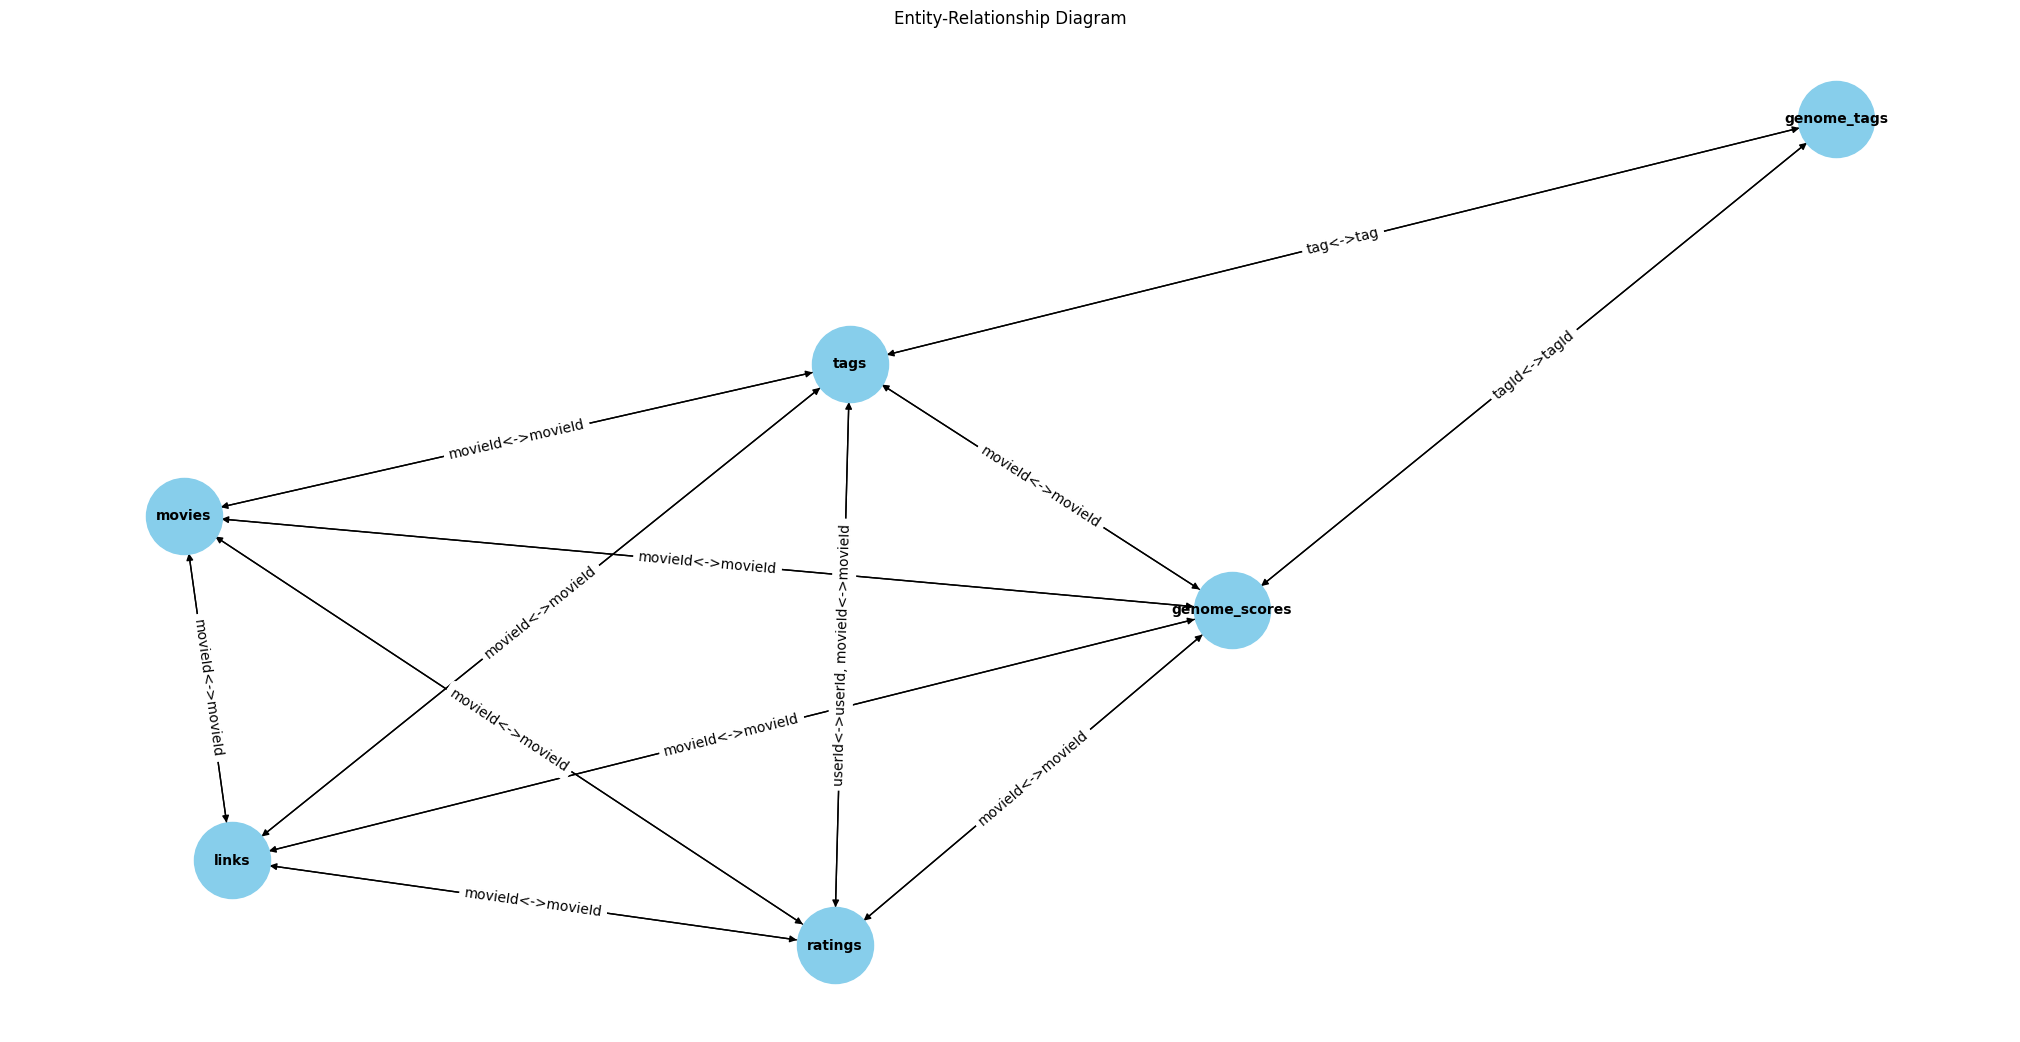

In [30]:
# Findet die gemeinsamen Spalten zwischen zwei DataFrames
def find_common_columns(df1, df2):
    return list(set(df1) & set(df2))

# Erstelle einen gerichteten Graphen, um das ER-Diagramm darzustellen.
G = nx.DiGraph()

# Füge Knoten zum Graphen hinzu
for df_name in ml_data:
    G.add_node(df_name)

# Füge basierend auf den gleichen Spalten die Kanten hinzu
for source, source_df in ml_data.items():
    for target, target_df in ml_data.items():
        if source != target:
            common_columns = find_common_columns(source_df, target_df)
            if common_columns:
                G.add_edge(source, target, keys=[(col, col) for col in common_columns if col!="timestamp"])

# Erstelle ER Diagramm
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')

# Labels für die Kanten
edge_labels = {(u, v): ', '.join([f"{src}<->{tgt}" for src, tgt in keys]) for u, v, keys in G.edges(data='keys')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Entity-Relationship Diagram')
plt.show()

In [31]:
# Weitere Statistiken
print('Anzahl der Benutzer, die Filme bewertet haben:', df_ratings.userId.nunique())
print('Anzahl der Filme:', df_movies.movieId.nunique())
print('Anzahl der Filme, die bewertet wurden:', df_ratings.movieId.nunique())
print('Anzahl der Bewertungen:', df_ratings.rating.count())
print('Anzahl der Benutzertags:', df_tags.tag.nunique())
print('Anzahl der Filme, die von Benutzern getaggt wurden:', df_tags.movieId.nunique())
print('Prozentsatz der Benutzer, die Filme getaggt haben:', (df_tags.tag.nunique()/df_ratings.userId.nunique())*100, '%')
print('Prozentsatz der Filme, die von Benutzern getaggt wurden:', (df_tags.movieId.nunique()/df_ratings.movieId.nunique())*100, '%')

Anzahl der Benutzer, die Filme bewertet haben: 162541
Anzahl der Filme: 62423
Anzahl der Filme, die bewertet wurden: 59047
Anzahl der Bewertungen: 25000095
Anzahl der Benutzertags: 73050
Anzahl der Filme, die von Benutzern getaggt wurden: 45251
Prozentsatz der Benutzer, die Filme getaggt haben: 44.942506813665474 %
Prozentsatz der Filme, die von Benutzern getaggt wurden: 76.63556150185445 %


Da das Produktionsjahr der Filme scheinbar im Titel vermerkt ist kann mithilfe dieser Information ein neues Merkmal "year" erstellt werden. Jeder Film hat in der Genre Spalte unter Umständen auch mehrere Genres gelistet. Daraus kann ein neues Attribut erstellt werden, welches angibt wie viele Genres ein Film hat "genre_count". Die Information ob ein Film ein gewisses Genre enthält kann mithilfe von One-Hot-Encoding (OHE) dargestellt werden.

In [32]:
# Produktionsjahr
df_movies["year"] = df_movies["title"].str.findall('\((\d{4})\)').str.get(0)
# Genre Anzahl
df_movies["genre_count"] = df_movies['genres'].apply(lambda x: len(x.split('|')))
# One Hot Encoding für Genres
df_movies = df_movies.join(df_movies["genres"].str.get_dummies().astype(int).add_suffix("_ohe"))

Nicht alle Titel scheinen ein Produktionsjahr im Namen zu haben.

In [33]:
df_movies.query("year.isnull()")

,movieId,title,genres,year,genre_count,(no genres listed)_ohe,Action_ohe,Adventure_ohe,Animation_ohe,Children_ohe,...,Film-Noir_ohe,Horror_ohe,IMAX_ohe,Musical_ohe,Mystery_ohe,Romance_ohe,Sci-Fi_ohe,Thriller_ohe,War_ohe,Western_ohe
15036,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN,4,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
25387,123619,Terrible Joe Moran,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26284,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26309,125632,In Our Garden,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26392,125958,Stephen Fry In America - New World,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62071,207714,Tales of Found Footage,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62104,207884,Enduring Destiny,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62285,208597,Punk the Capital: Building a Sound Movement,Documentary,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62326,208763,Yosemite: The Fate of Heaven,(no genres listed),NaN,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Mithilfe der OHE-Spalten kann dargestellt werden welches Genre am häufigsten im Datensatz vorkommt.

[Text(0.5, 0, 'Frequenz'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Absolute Häufigkeit aller Genres')]

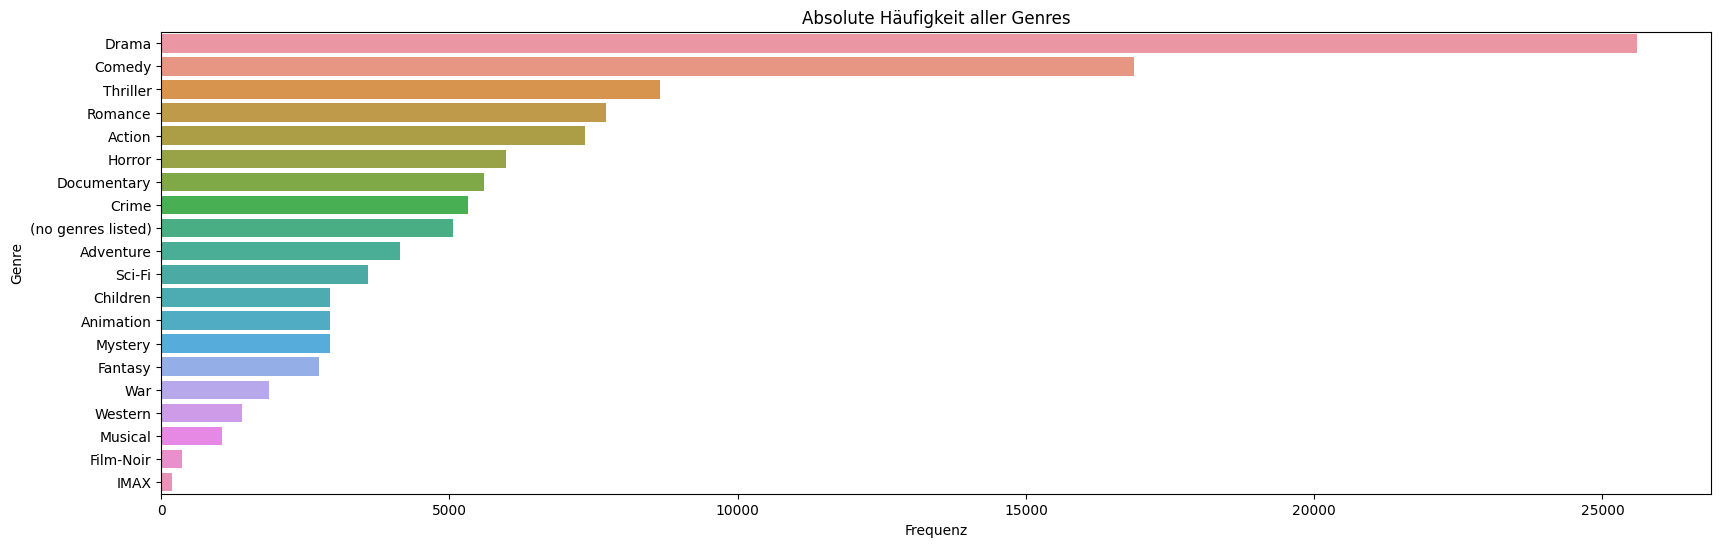

In [34]:
genre_frequency = df_movies.filter(like="_ohe").sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(
    x=genre_frequency.values,
    y=[col.split("_ohe")[0] for col in genre_frequency.index],
    orient = 'h'
).set(xlabel="Frequenz", ylabel="Genre", title="Absolute Häufigkeit aller Genres")

Eine Möglichkeit ist, dass ggf. die Problemstellung im Experiment etwas vereinfacht werden kann. Die Bewertungen, ob ein Film bei den Nutzern Gefallen gefunden hat oder nicht, könnten als binäre Entscheidung definiert werden. Jede Bewertung ab vier Sternen bedeutet, dass ein Nutzer einen Film gemocht hat. Dies ist ein selbst festgelegter Wert. Alles darunter bedeutet, dass ein Nutzer den Film nicht gemocht hat.

In [35]:
df_ratings["liked"] = (df_ratings["rating"]>=4).astype(int)

Mithilfe eines groupby kann nun dargestellt werden welche Filme besonderen Gefallen bei den Nutzern finden.

In [46]:
best_rated_movie_ids = df_ratings.groupby("movieId", as_index=False).sum().sort_values(by="liked", ascending=False).head(10)["movieId"].values
best_rated_movies = df_movies[df_movies["movieId"].isin(best_rated_movie_ids)]["title"]
best_rated_movies

49                             Usual Suspects, The (1995)
257             Star Wars: Episode IV - A New Hope (1977)
292                                   Pulp Fiction (1994)
314                      Shawshank Redemption, The (1994)
351                                   Forrest Gump (1994)
522                               Schindler's List (1993)
585                      Silence of the Lambs, The (1991)
1166    Star Wars: Episode V - The Empire Strikes Back...
2480                                   Matrix, The (1999)
2867                                    Fight Club (1999)
Name: title, dtype: object

Neben den bestbewerteten Filmen ist es auch interessant zu wissen welche besonders oft bewertet wurden.

In [47]:
most_rated_movie_ids = df_ratings["movieId"].value_counts().nlargest(10).index
most_rated_movies = df_movies[df_movies["movieId"].isin(most_rated_movie_ids)]["title"]
most_rated_movies

108                             Braveheart (1995)
257     Star Wars: Episode IV - A New Hope (1977)
292                           Pulp Fiction (1994)
314              Shawshank Redemption, The (1994)
351                           Forrest Gump (1994)
475                          Jurassic Park (1993)
522                       Schindler's List (1993)
585              Silence of the Lambs, The (1991)
2480                           Matrix, The (1999)
2867                            Fight Club (1999)
Name: title, dtype: object

Acht der top zehn meistbewerteten Filme befinden sich auch unter den top zehn der bestbewerteten.

In [48]:
set(most_rated_movies).intersection(set(best_rated_movies))

{'Fight Club (1999)',
 'Forrest Gump (1994)',
 'Matrix, The (1999)',
 'Pulp Fiction (1994)',
 "Schindler's List (1993)",
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'Star Wars: Episode IV - A New Hope (1977)'}

## 3.4 Preprocessing Pipeline

Preprocessing ist ein Überbegriff für sämtliche Datentransformationen vor dem Training eines ML-Modells. Darunter fallen sowohl die zuvor besprochene Datenbereinigung und das Feature Engineering, als auch die Skalierung der Daten und die anschließende Aufspaltung in Trainings-, Validierungs- und Testdatensatz. Für die Erkundungsphase in einem Projekt bietet sich oftmals das Ausführen und Testen von Code in Notebooks an. Hat man jedoch die erste Iteration eines ML-Zykluses erfolgreich absolviert, sollte sämtliche Funktionalität in produktionsfertige Software ausgelagert werden. Diese lässt sich besser testen und stellt Reproduzierbarkeit von der Datenaufbereitung bis hin zum Training und der Bereitstellung sicher. Die Schritte aus den vorherigen Kapiteln sind in `src/processing.py` als Processing Pipeline zu finden. Da MAB-Algorithmen in der Regel in einem Online-Lernumfeld eingesetzt werden erfolgt kein klassischer Train-Test-Split für die Daten. Wenn ein Train-Test-Split durchgeführt würde, würde dies bedeuten, dass das System während der laufenden Interaktion mit neuen Benutzern oder Daten nicht lernt und somit nicht optimal auf neue Informationen reagiert.

## 3.5 Simulationsumgebung

Die technische Implementierung des Banditen und der Richtlinien mit angepasster Dokumentation ist in `src` wiederzufinden und beruht auf Hochart [9]. Der konzeptionelle Aufbau der Simulationsumgebung mit den Besonderheiten bei einer Offline Evaluation für MAB ist zurückzuführen auf LeDoux [10] und wird in diesem Kapitel wiedergegeben. LeDoux referenziert hierbei Li et. al. [11], welche eine Methodik zur Offline Evaluation von MAB-Algorithmen vorstellen, auch Replay Evaluation, oder Replayer-Methode genannt. Da MAB-Algorithmen zu den Online Learning Algorithmen gehören, müssen sie in jedem Zeitschritt in der Lage sein, Daten aus der Vergangenheit zu beobachten und so die Entscheidungsregel zu aktualisieren. Die zeitliche Komponente bedeutet, dass die Trainingsdaten, die dem Banditen zur Verfügung stehen, ständig wechseln und dass die Kennzahl, die zur Bewertung verwendet wird, sich im Laufe der Zeit ebenfalls ändert, basierend auf kleinen Rückmeldungen aus dem jüngsten Zeitschritt, anstatt auf Rückmeldungen aus einem großen Testdatensatz wie bei einem traditionellen ML-Ansatz. Normalerweise würde der Bandit also nach jedem Zeitschritt (in dieser Arbeit gleichzusetzen mit einer Filmbewertung) die Entscheidungsregel aktualisieren und so über den gesamten Datensatz eine große Zahl an kleinen Veränderungen vornehmen. Da dies rechnerisch sehr aufwändig ist sollen die Zeitschritte gestapelt werden. Anstatt den Algorithmus einmal pro Bewertungsereignis zu aktualisieren, findet eine Aktualisierung alle $n$ Ereignisse statt, was die verwendete Anzahl von Zeitschritten für den gesamten Datensatz auf $\frac{t}{n}$ reduziert. Laut LeDoux [10] käme diese Anpassung auch einer realen produktiven Umgebung nahe, da dort die Daten meist gemäß einem Cron-Zeitplan aktualisiert werden würden. Des Weiteren soll die Empfehlung von einem einzigen Film pro Zeitschritt auf eine Empfehlungsliste mit *k* Vorschlägen erweitert werden. In der einfachsten Version empfiehlt ein Bandit einen Film, und der Benutzer reagiert positiv oder negativ darauf. Bei der Bewertung eines Banditen anhand historischer Daten wisse man nicht immer, wie ein Benutzer auf die Empfehlungsrichtlinie reagiert hätte, da man nur die Reaktion des Benutzers auf den Film kenne, den das Produktionssystem ihm auf der Website angezeigt habe. Solche Empfehlungen sollen laut LeDoux [10] verworfen werden, und aus diesem Grund erwiese sich die Empfehlung eines Films pro Zeitschritt als ineffizient, aufgrund der großen Anzahl von Empfehlungen, aus denen man nicht lernen könne. In diesem Experiment werden dem Benutzer die Top 5 Filme des Banditen empfohlen und wenn der Benutzer einen dieser Filme bewertet, kann diese Beobachtung verwendet werden, um den Algorithmus zu verbessern. Um die Leistung von MAB-Algorithmen nun offline zu evaluieren kann die Replay Evaluation angewandt werden [11]. Dies funktioniert, indem simuliert wird, welche Aktion der Algorithmus für einen Benutzer auswählen würde. Wenn es einen historischen Datensatz über die Interaktion des Benutzers mit dieser Aktion gibt, wird das Ergebnis – ob die Erfahrung positiv oder negativ war – berücksichtigt, als ob es tatsächlich stattgefunden hätte. Wenn es keinen historischen Datensatz für diese Interaktion gibt, wird sie nicht berücksichtigt. Durch die Verwendung der Replayer-Methode können MAB-Algorithmen anhand eines historischen Datensatzes von Filmbewertungen evaluiert werden. Für die Auswertung werden lediglich die Film IDs und die Bewertungen herangezogen.

# Kapitel 4
# Ergebnisse und Diskussion

Im folgenden Kapitel wird die Leistung der verschiedenen Modelle auf den MovieLens Datensatz untersucht. Dabei werden die drei verwendeten Algorithmen gegenübergestellt. Anschließend werden die Ergebnisse diskutiert und bewertet.


Die Ergebnisse können über die Hauptfunktion in `src/main.py` erstellt werden. Hierfür muss die `main.py` ausgeführt werden. In Abbildung 4.1 sind die durchschnittlichen und kummulativen Belohnungen der drei Banditen dargestellt.

<div style="text-align:center">
    <img src="imgs\experiment\Belohnungen für Bandit-Problem mit Replay-Auswertung.PNG" style="width:1000px;height:500px"/>
    <p style="font-style: italic;">Abbildung 4.1: Belohnungen für Bandit-Problem mit Replay-Auswertung</p>
</div>

Zunächst ist zu erkennen, dass Epsilon-Greedy sowohl in den durschnittlichen als auch in den kummulativen Belohnungen besser performt als UCB und Thompson Sampling. In den ersten Phasen des Experiments, in denen die Belohnungen noch nicht gut bekannt sind, hat der Epsilon-Greedy-Algorithmus wahrscheinlich vermehrt auf Exploration gesetzt. Dieser Vermutung nach sollte eig. die durchschnittliche Belohnung langsamer ansteigen, da einige zufällige und möglicherweise schlechte Aktionen ausprobiert wurden. Dies ist jedoch nicht der Fall. Nach ca. 1000 Zeitschritten beginnt der Algorithmus, die besten Aktionen zu identifizieren und sich stärker auf die Ausbeutung zu konzentrieren. Dies führt dazu, dass die Belohnungskurve nur noch langsam ansteigt und sich auf einem Plateau einpendelt. Da der UCB die Aktion auswählt, die die höchste obere Vertrauensgrenze für die Belohnung hat, ist zu erwarten, dass tendenziell weniger erkundet wird je mehr Daten vorhanden sind. Zu Beginn des Experiments sind die Unsicherheiten hoch, weshalb UCB dazu neigt, Aktionen mit hohen potenziellen Belohnungen zu erkunden, um mehr Informationen zu sammeln. Thompson Sampling beginnt mit einer gewissen Erkundung, da die anfänglichen Stichproben aus den Unsicherheiten der Belohnungsfunktionen zufällig gezogen werden. Dies könnte die hohe Spitze zu Beginn des Experiments erklären. Da UCB jedoch Informationen über die Unsicherheit verwendet, kann er nach einer gewissen Zeit genauer zwischen guten und schlechten Aktionen unterscheiden, was zu einem Anstieg der durchschnittlichen Belohnung führt. Dies erklärt, warum UCB in späteren Phasen Thompson Sampling überholt. Durch diese Beobachtungen kann vermutet werden, dass eine ausgiebige Erkundung zu Beginn des Experiments zu präferieren ist und dazu führt, dass so die besten Aktionen identifiziert werden können. In diesem Fall ist also der Epsilon-Greedy zu bevorzugen, jedoch könnte in weiteren Experimenten der Grad der Erkundung bei UCB angepasst werden um evtl. eine mögliche Steigerung in der Bewertungsleistung anzustreben. Bei einem Bewertungsintervall von null bis fünf Sternen für die Filme kann der Epsilon-Greedy mit einer durchschnittlichen Belohnung von ca. vier Sternen durchaus als ein zuverlässiges Recommender System eingesetzt werden.

# Zusammenfassung und Ausblick

Die vorliegende Arbeit untersuchte die Potenziale von MAB-Algorithmen als Recommender Systeme für Filmempfehlungen. Dabei wurde den Fragen nachgegangen ob MAB-Algorithmen für diese Problemstellung geeignet sind. Ein Vergleich der drei Banditen hinsichtlich ihrer Leistung sollte Aufschluss darüber geben, ob die Nutzung einer Methode zu bevorzugen ist. Für die Simulation wurden die Daten der Filmempfehlungen des MovieLens Datensatzes [1] verwendet. Eine Beschränkung dabei war, dass MAB-Algorithmen in der Regel zu Online Learning Algorithmen gehören und daher Replay Evaluation (vgl. Kapitel 3.5) eingesetzt werden musste, um die Algorithmen hinsichtlich ihrer Filmempfehlungsqualität zu beurteilen. Aus den Ergebnissen lässt sich schließen, dass sich mithilfe von MAB-Algorithmen durchaus gute Filmempfehlungen liefern lassen. Dabei scheint eine ausgiebige Exploration in der Anfangsphase des Trainings dazu zu führen, dass so wahrscheinlicher die optimalen Aktionen vom Agenten gefunden und anschließend ausgebeutet werden können. Hinsichtlich der Ergebnisse lassen sich folgende Fragen ableiten die in weiterführenden Arbeiten untersucht werden könnten:

1. Ist es möglich mithilfe von Hyperparameteroptimierung die Leistung der schlechter performenden Banditen zu verbessern, indem man z.B. den Grad der Exploration verändert?
2. Kann durch Hinzuziehen von weiteren Attributen aus den MovieLens Daten, wie z.B. dem Genre der Filme, die Belohnung noch gesteigert werden?
3. MAB-Algorithmen sind eine grundlegende Form des RL. Heutzutage gibt es RL-Algorithmen auf Basis von neuronalen Netzen die unter Umständen potenter sein können als MABs. Würde sich durch den Einsatz solcher Modelle die Filmempfehlungsqualtität noch verbessern lassen?

Aus der Analyse der Ergebnisse lässt sich jedoch bereits die Schlussfolgerung ziehen, dass der Einsatz von MAB-Algorithmen eine valide Strategie für Recommender Systeme sein kann. In der vorliegenden Arbeit konnte das Experiment erfolgreich reproduziert werden, wodurch gezeigt wird, dass MAB-Algorithmen das Potenzial haben, gute Filmempfehlungen zu liefern und eine vielversprechende Grundlage für zukünftige Forschung und Anwendungen darstellen.

# Literatur

[1] F. Maxwell Harper and Joseph A. Konstan, *The MovieLens Datasets: History and Context*, ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19, 2015, DOI: 10.1145/2827872.

[2] C. C. Aggarwal, *Recommender Systems, The Textbook*, 1. Aufl. Yorktown Heights, NY, USA: Springer Cham, 2016, ISBN: 978-3-319-29657-9. DOI: 10.1007/978-3-319-29659-3.

[3] A. L. Samuel, "Some Studies in Machine Learning Using the Game of Checkers", *IBM Journal of Research and Development*, Jg. 3, Nr. 3, S. 210–229, 1959, ISSN: 0018-8646. DOI: 10.1147/rd.33.0210.

[4] M. Sahami, D. Susan, D. Heckerman und E. Horvitz, "A Bayesian Approach to Filtering Junk E-Mail", *Learning for Text Categorization: Papers from the 1998 Workshop*, S. 55–62, 1998.

[5] A. Géron, *Hands-on machine learning with Scikit-Learn and TensorFlow, Concepts, tools, and techniques to build intelligent systems*, 2. Aufl. Sebastopol (Kalifornien): O’Reilly, 2019, ISBN: 1492032646.

[6] A. G. Barto and R. S. Sutton, *Reinforcement Learning, An Introduction*, 2. Aufl. Cambridge, Massachusetts and London, England: The MIT Press, 2018, ISBN: 9780262039246.

[7] J. M. White, *Bandit Algorithms for Website Optimization*, Sebastopol (Kalifornien): O’Reilly, 2012, ISBN: 9781449341336.

[8] D. Russo, B. Van Roy, A. Kazerouni, I. Osband, Z. Wen, "A Tutorial on Thompson Sampling", *Foundations and Trends in Machine Learning, Vol. 11*, 2018, DOI: 10.48550/arXiv.1707.02038.

[9] A. Hochart, *Unbiased offline evaluation of multi-armed bandit algorithms*, 2020, https://github.com/antoine-hochart/bandit_algo_evaluation, Aufgerufen am 14.07.2023

[10] J. LeDoux, *Offline Evaluation of Multi-Armed Bandit Algorithms in Python using Replay*, 2020, https://jamesrledoux.com/algorithms/offline-bandit-evaluation, Aufgerufen am 14.07.2023

[11] L. Li, W. Chu, J. Langford, X. Wang, "Unbiased Offline Evaluation of Contextual-bandit-based News Article Recommendation Algorithms", *WSDM 2011*, 2010, DOI: 10.48550/arxiv.1003.5956.